# Pontifícia Universidade Católica  PUC-Rio
# Sprint: Análise de Dados e Boas Práticas
### Aluno: Leonardo Braga De Vincenzi
#### MVP Sprint 1 (Dez/2023)

## 1. Definição do Problema

**Qual o objetivo desse MVP?**

O desafio desse projeto acadêmico é, em poucas palavras, buscar o aumento das vendas e da lucratividade de uma empresa comercial varejista.

**Como fazer isso?**

Por meio de uma base de dados inicial de vendas, e pela sua análise, obteremos insights e informações que possam ser relevantes e necessárias para melhorar a tomada de decisão gerencial.

Inicialmente buscaremos conhecer melhor o perfil do nosso cliente, suas preferências, entender melhor porque um estado vende mais que o outro, sua sazonalidade e quais são os produtos mais vendidos.

A idéia é buscar o aperfeiçoamento da relação "consumidor x produto".

**Sobre o dataset utilizado**

O dataset usado neste projeto será o **Customer Shopping Trends Dataset**. Ele oferece informações a respeito do comportamento do consumidor e seus padrões de compra. Como seus dados estão rotulados, trata-se de um aprendizado supervisionado.

Este conjunto de dados captura uma gama de atributos do cliente que inclui idade, sexo, histórico de vendas, métodos de pagamento, frequência de vendas e avaliações de feedback.

Além disso, possui dados sobre os tipos de itens adquiridos, épocas preferidas e interações com ofertas promocionais.

**Sobre o mercado do comércio varejista**

Compreender as dinâmicas e tendências do cliente é fundamental para que as lojas entendam melhor o seu nicho de mercado, oferecendo novos produtos, desenvolvendo estratégias de marketing eficazes, e alinhando suas estratégias de vendas com as novas preferências dos consumidores.

Por ser um segmento volátil, sazonal e ligado a modismos, a análise desses dados pode auxiliar de forma vantajosa empresas ligadas ao comércio varejista na tomada de decisões gerenciais mais rápidas e precisas.

**Restrições do dataset**

Com uma coleção de 3.900 registros, este dataset foi criado com objetivos acadêmicos pelo ChatGPT. Portanto a sua restrição é que se trata de um dataset criado por modelo de inteligência artificial, não representando um caso real.

**Desafios**

O desafio de se trabalhar com um dataset criado por uma máquina é buscar informações relavantes para o problema proposto, mesmo sabendo que seus dados tenham sido criados seguindo uma lógica.

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

* OBS 1: Alguns valores nulos foram inseridos no dataset para que possa ocorrer o pré-processamento.
* OBS 2: Também houve a tradução dos atributos e seus valores.

**Informações sobre os atributos do dataset:**

01. **ID do Cliente** - Identificador exclusivo do cliente
(1, ...,3900) (chave única primária)
02. **Idade** - Idade do Cliente (18, ...,70)
03. **Sexo** - Gênero do Cliente (Homem, Mulher)
04. **Item Vendido** - Descrição do item vendido para o cliente (Mochila, Cinto, Blusa, Botas, Casaco, Vestido, Luvas, Bolsa, Chapeu, Moletom, Jaqueta, Jeans, Joias, Calcas, Sandalias, Cachecol, Camisa, Sapatos, Shorts, Saia, Tenis, Meias, Oculos de sol, sueter, T-shirt)
05. **Categoria** - Categoria do bem adquirido (Acessorios, Roupas, Agasalhos, Calcados)
06. **Valor da Venda (USD)** - Valor da venda (20, ...,100)
07. **Localizacao** - Local onde a venda foi realizada (Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming)
08. **Tamanho** - Tamanho do item adquirido (P,M,G,XG)
09. **Cor** - Cor do item adquirido (Beige, Black, Blue, Brown, Charcoal, Cyan, Gold, Gray, Green, Indigo, Lavender, Magenta, Maroon, Olive, Orange, Peach, Pink, Purple, Red, Silver, Teal, Turquoise, Violet, White, Yellow)
10. **Temporada** - Estação na qual a venda foi feita (Outono, Primavera, Verao, Inverno)
11. **Avaliacao** - Nota dada pelo cliente para o item vendido (25, ...,50)
12. **Assinatura** - Indica se o cliente possui cartão de fidelidade com a loja (Sim, Nao)
13. **Envio** - Tipo de envio da venda escolhido pelo ciente (Frete em 2 dias, Expresso, Frete gratis, Aeeo no dia seguinte, Padrao, Retirada na loja)
14. **Desconto** - Indica se foi aplicado um desconto durante a venda (Sim, Nao)
15. **Codigo Promocional** - Indica se foi usado um código promocional durante a venda (Sim, Nao)
16. **Vendas Anteriores** - Número total de vendas concluídas pelo cliente, excluindo a transação atual (1, ...,50)
17. **Forma de Pagamento** - Método de pagamento escolhido pelo cliente (Transferencia Bancaria, Dinheiro, Cartao de Credito, Cartao de Debito, PayPal, Pix)
18. **Frequencia de Vendas** - Frequência que o cliente retorna à loja.
(Anualmente, Quinzenalmente, A cada 3 meses, Mensalmente, Trimestralmente, Semanalmente)


Importando bibliotecas e definindo padrão de cores do MVP.

In [ ]:
# Imports (bibliotecas)
#
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Definindo as Cores
#
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

Configurando o MVP para não exibir mensagens de aviso.

In [ ]:
# Configurando para não exibir os warnings no meio do MVP
#
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar a biblioteca Pandas (*Python Data Analysis Library*) para carregar de um arquivo .csv disponível online.

Aqui teremos a primeira visualização do dataset.

In [ ]:
# Carregando arquivo .csv usando Pandas (pd) acessando uma URL

# Informando a URL de importação do dataset
# url_dados = "https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVV_1/main/shopping_trends3.csv"

# Informando o cabeçalho das colunas
# colunas_old = ['Customer ID','Age','Gender','Item Purchased','Category','Purchase Amount (USD)','Location','Size','Color','Season','Review Rating','Subscription Status','Shipping Type','Discount Applied','Promo Code Used','Previous Purchases','Payment Method','Frequency of Purchase']
# colunas_new = ['ID do Cliente','Idade','Sexo','Item Vendido','Categoria','Valor da Venda (USD)','Localizacao','Tamanho','Cor','Temporada','Avaliacao','Assinatura','Envio','Desconto','Codigo Promocional','Vendas Anteriores','Forma de Pagamento','Frequencia de Vendas']

# Lendo o arquivo utilizando as colunas informadas
# dataset = pd.read_csv(url_dados, names=colunas2, skiprows=1, delimiter=',')

# Carregando arquivo .csv usando Pandas (pd) acessando uma URL
#
dataset = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVV_1/main/shopping_trends3.csv")
dataset.sample(5)


,ID do Cliente,Idade,Sexo,Item Vendido,Categoria,Valor da Venda (USD),Localizacao,Tamanho,Cor,Temporada,Avaliacao,Assinatura,Envio,Desconto,Codigo Promocional,Vendas Anteriores,Forma de Pagamento,Frequencia de Vendas
1434,1435,59,Homem,Sueter,Roupas,64,New York,G,Marrom,Verao,46,Nao,Free Shipping,Sim,Sim,21,PayPal,Quinzenalmente
416,417,36,Homem,Cinto,Acessorios,55,Oregon,G,Oliva,Primavera,38,Sim,Free Shipping,Sim,Sim,24,Transferencia bancaria,Quinzenalmente
2468,2469,65,Homem,Saia,Roupas,21,Connecticut,G,Ciano,Inverno,37,Nao,Frete em 2 dias,Nao,No,6,Cartao de Credito,Semanalmente
871,872,47,Homem,Bolsa,Acessorios,42,Hawaii,M,Carvao,Primavera,26,Sim,Next Day Air,Sim,Sim,45,Transferencia bancaria,Trimestralmente
789,790,33,Homem,Bolsa,Acessorios,84,Idaho,P,Roxo,Outono,27,Sim,Standard,Sim,Sim,4,PIX,Quinzenalmente


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Com o dataset carregado, iremos explorá-lo um pouco. Vamos iniciar examinando as dimensões do dataset, suas informações, distribuição e alguns exemplos de linhas.

Checaremos o número de linhas e colunas do dataset.

In [ ]:
# Mostrando dimensões (linhas e colunas) do arquivo carregado
#
dataset.shape

(3900, 18)

Podemos verificar que o dataset tem 3900 linhas (entradas) de 18 colunas.

Checaremos o nome das colunas do dataset (atributo).

In [ ]:
# Mostrando o nome dos atributos
#
dataset.columns

Index(['ID do Cliente', 'Idade', 'Sexo', 'Item Vendido', 'Categoria',
       'Valor da Venda (USD)', 'Localizacao', 'Tamanho', 'Cor', 'Temporada',
       'Avaliacao', 'Assinatura', 'Envio', 'Desconto', 'Codigo Promocional',
       'Vendas Anteriores', 'Forma de Pagamento', 'Frequencia de Vendas'],
      dtype='object')

Mostraremos a estrutura dos atributos do dataset.

Com essas informações verificaremos os tipos dos atributos do dataset e analizaremos suas possíveis conversões.


In [ ]:
# Mostrando informações do arquivo carregado
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID do Cliente         3900 non-null   int64 
 1   Idade                 3900 non-null   int64 
 2   Sexo                  3900 non-null   object
 3   Item Vendido          3900 non-null   object
 4   Categoria             3900 non-null   object
 5   Valor da Venda (USD)  3900 non-null   int64 
 6   Localizacao           3900 non-null   object
 7   Tamanho               3900 non-null   object
 8   Cor                   3900 non-null   object
 9   Temporada             3900 non-null   object
 10  Avaliacao             3900 non-null   int64 
 11  Assinatura            3900 non-null   object
 12  Envio                 3900 non-null   object
 13  Desconto              3900 non-null   object
 14  Codigo Promocional    3900 non-null   object
 15  Vendas Anteriores     3900 non-null   

Mostraremos as primeiras 10 linhas do dataset.

In [ ]:
# Mostrando as 10 primeiras linhas
#
dataset.head(10)

,ID do Cliente,Idade,Sexo,Item Vendido,Categoria,Valor da Venda (USD),Localizacao,Tamanho,Cor,Temporada,Avaliacao,Assinatura,Envio,Desconto,Codigo Promocional,Vendas Anteriores,Forma de Pagamento,Frequencia de Vendas
0,1,55,Homem,Blusa,Roupas,53,Kentucky,G,Cinza,Inverno,31,Sim,Expresso,Sim,Sim,14,Cartao de Credito,Quinzenalmente
1,2,19,Homem,Sueter,Roupas,64,Maine,G,Marrom,Inverno,31,Sim,Expresso,Sim,Sim,2,Transferencia bancaria,Quinzenalmente
2,3,50,Homem,Jeans,Roupas,73,Massachusetts,P,Marrom,Primavera,31,Sim,Free Shipping,Sim,Sim,23,Em dinheiro,Semanalmente
3,4,21,Homem,Sandalhas,Calcados,90,Rhode Island,M,Marrom,Primavera,35,Sim,Next Day Air,Sim,Sim,49,PayPal,Semanalmente
4,5,45,Homem,Blusa,Roupas,49,Oregon,M,Turquesa,Primavera,27,Sim,Free Shipping,Sim,Sim,31,Em dinheiro,Anualmente
5,6,46,Homem,Tenis,Calcados,20,Wyoming,M,Branco,Verao,29,Sim,Standard,Sim,Sim,14,PIX,Semanalmente
6,7,63,Homem,Shirt,Roupas,85,Montana,M,Cinza,Outono,32,Sim,Free Shipping,Sim,Sim,49,Cartao de Debito,Trimestralmente
7,8,27,Homem,Shorts,Roupas,34,Louisiana,G,Carvao,Inverno,32,Sim,Free Shipping,Sim,Sim,19,Cartao de Debito,Semanalmente
8,9,26,Homem,Casaco,Agasalhos,97,West Virginia,G,Prateado,Verao,26,Sim,Expresso,Sim,Sim,8,PIX,Anualmente
9,10,57,Homem,Bolsa,Acessorios,31,Missouri,M,Rosa,Primavera,48,Sim,Frete em 2 dias,Sim,Sim,4,PayPal,Trimestralmente


Essas são as 10 últimas linhas do dataset.

In [ ]:
# Mostrando as 10 últimas linhas
#
dataset.tail(10)

,ID do Cliente,Idade,Sexo,Item Vendido,Categoria,Valor da Venda (USD),Localizacao,Tamanho,Cor,Temporada,Avaliacao,Assinatura,Envio,Desconto,Codigo Promocional,Vendas Anteriores,Forma de Pagamento,Frequencia de Vendas
3890,3891,35,Mulher,Shirt,Roupas,81,Nebraska,XG,Verde,Inverno,26,Nao,Standard,Nao,No,33,Cartao de Credito,Anualmente
3891,3892,36,Mulher,Vestido,Roupas,30,Colorado,G,Pessego,Inverno,47,Nao,Free Shipping,Nao,No,6,Em dinheiro,Trimestralmente
3892,3893,35,Mulher,Joias,Acessorios,86,Michigan,G,Indigo,Verao,35,Nao,Standard,Nao,No,5,Transferencia bancaria,Quinzenalmente
3893,3894,21,Mulher,Chapeu,Acessorios,64,Massachusetts,G,Branco,Outono,33,Nao,Retirado na loja,Nao,No,29,Transferencia bancaria,Quinzenalmente
3894,3895,66,Mulher,Saia,Roupas,78,Connecticut,G,Branco,Primavera,39,Nao,Frete em 2 dias,Nao,No,44,Em dinheiro,A cada 3 meses
3895,3896,40,Mulher,Moletom,Roupas,28,Virginia,G,Turquesa,Verao,42,Nao,Frete em 2 dias,Nao,No,32,Em dinheiro,Semanalmente
3896,3897,52,Mulher,Mochila,Acessorios,49,Iowa,G,Branco,Primavera,45,Nao,Retirado na loja,Nao,No,41,PayPal,Quinzenalmente
3897,3898,46,Mulher,Cinto,Acessorios,33,New Jersey,G,Verde,Primavera,29,Nao,Standard,Nao,No,24,Cartao de Credito,Trimestralmente
3898,3899,44,Mulher,Sapatos,Calcados,77,Minnesota,P,Marrom,Verao,38,Nao,Expresso,Nao,No,24,PayPal,Semanalmente
3899,3900,52,Mulher,Bolsa,Acessorios,81,California,M,Bege,Primavera,31,Nao,Retirado na loja,Nao,No,33,Transferencia bancaria,Trimestralmente


Verificaremos agora qual o valor mais frequente para cada atributo do conjunto de dados do dataset.

In [ ]:
# Calculando o valor da moda (valor mais frequente) para cada um dos 18 atributos
#
moda = dataset.mode()
moda[:1]

,ID do Cliente,Idade,Sexo,Item Vendido,Categoria,Valor da Venda (USD),Localizacao,Tamanho,Cor,Temporada,Avaliacao,Assinatura,Envio,Desconto,Codigo Promocional,Vendas Anteriores,Forma de Pagamento,Frequencia de Vendas
0,1,69.0,Homem,Blusa,Roupas,32.0,Montana,M,Marrom,Primavera,34.0,Nao,Free Shipping,Nao,No,31.0,Cartao de Credito,Quinzenalmente


Realizaremos um resumo estatístico do dataset.

In [83]:
# Realizando um resumo estatístico (média, desvio padrão, mínimo, 1° quartil, mediana, 3° quartil e máximo)
#
dataset.describe()

,ID do Cliente,Idade,Valor da Venda (USD),Avaliacao,Vendas Anteriores
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,37.499487,25.351538
std,1125.977353,15.207589,23.685392,7.162228,14.447125
min,1.000000,18.000000,20.000000,25.000000,1.000000
25%,975.750000,31.000000,39.000000,31.000000,13.000000
50%,1950.500000,44.000000,60.000000,37.000000,25.000000
75%,2925.250000,57.000000,81.000000,44.000000,38.000000
max,3900.000000,70.000000,100.000000,50.000000,50.000000


Observamos que os atributos "Idade", "Valor da Venda (USD)", "Avaliacao" e "Vendas Anteriores" possuem a média e a mediana praticamente iguais, indicando um coeficiente de assimetria (*skewness*) zero, ou seja, suas distribuições são perfeitamente simétricas.

Faremos agora algumas perguntas compostas a respeito do conteúdo do dataset.

Qual é a idade média dos clientes no dataset ?

In [ ]:
# Calculando a idade média dos clientes no dataset
#
media_de_idade_do_cliente = dataset['Idade'].mean()
print(f"A idade média dos clientes é {media_de_idade_do_cliente:,.0f} anos")

A idade média dos clientes é 44 anos


O valor obtido da idade média não se mostrou muito representativo, tendo em vista que o valor da moda da idade (valor mais fequente) foi 69. Isso se deve a fato do atributo "Idade" no dataset estar distribuido igualmente entre 18 e 70 anos. 44 anos é exatamente a média entre esses dois valores. Por essa razão, na estatística, em alguns casos a média pode ser um valor enganoso.

Pelo gráfico abaixo percebemos melhor esse motivo.

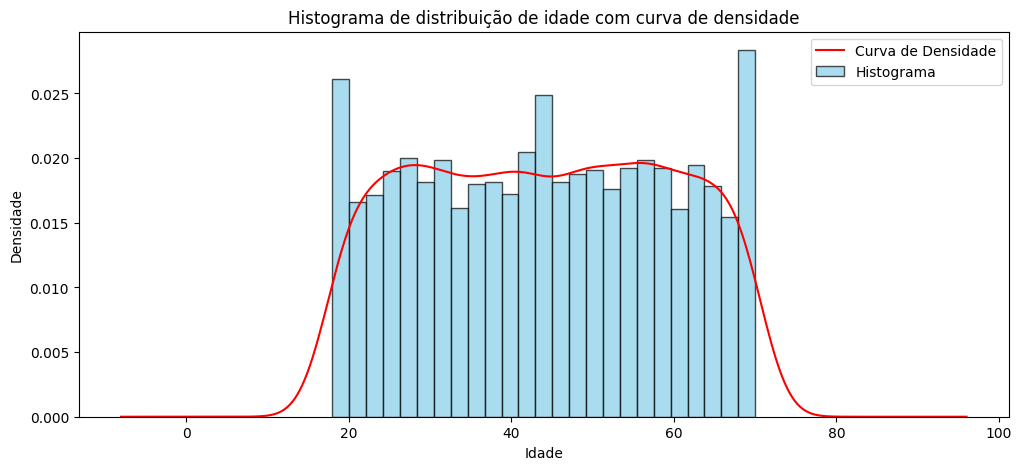

In [82]:
# Plotando um histograma de distribuição de idade com curva de densidade sobreposta
#
fig, ax = plt.subplots(figsize = (12, 5))
ax.hist(dataset['Idade'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
dataset['Idade'].plot(kind = 'kde', color = 'red', ax = ax)

# Definindo as linhas gerais do gráfico
#
ax.set_xlabel('Idade')
ax.set_ylabel('Densidade')
ax.set_title('Histograma de distribuição de idade com curva de densidade')
ax.legend(['Curva de Densidade', 'Histograma'])
plt.show()

Qual é o item mais vendido?

In [ ]:
# Achando o item mais vendido no dataset
#
item_mais_vendido = dataset['Item Vendido'].mode()[0]
print(f"O item mais vendido é {item_mais_vendido}")

O item mais vendido é Blusa


Dentro do item mais vendido, qual é a cor mais vendida?

In [ ]:
# Calculando a cor predileta e quantas vezes foi vendido o item acima
#
# Varrendo todas as linhas do dataframe
vendas = 0
for linha in range(len(dataset)):
    if dataset['Item Vendido'].iloc[linha] == item_mais_vendido:
        vendas = vendas + 1
        cor_mais_vendida = dataset['Cor'].mode()[0]
    else:
        continue

# Imprimindo a cor mais vendida do item mais vendido
#
print(f"O item tipo {item_mais_vendido} mais vendido é da cor {cor_mais_vendida}")
print()
print(f"Ele foi vendido {vendas} vezes")

O item tipo Blusa mais vendido é da cor Marrom

Ele foi vendido 171 vezes


Essa é uma informação relevante, pois descobrimos qual produto e de qual cor foi o mais vendido. Nossa futura estatégia de marketing e publicação de anúncios devem levar em consideração essa preferência.

Qual é o faturamento por categoria do produto?

In [86]:
# Calculando o faturamento total p/ categoria
#
faturamento_total_produto_por_categoria = dataset.groupby('Categoria')['Valor da Venda (USD)'].sum()
print("Total de produtos vendidos por categoria:")
print()
print(faturamento_total_produto_por_categoria)

Total de produtos vendidos por categoria:

Categoria
Acessorios     74200
Agasalhos      18524
Calcados       36093
Roupas        104264
Name: Valor da Venda (USD), dtype: int64


Verificamos que é da categoria "Roupas" que o nosso cliente é mais atraido para nossas lojas. Em segundo lugar são "Acessórios". Portanto devemos dar destaque a esses produtos nas vitrines, nos anúncios, nas gôndolas próximas às saídas dos caixas e nas estratégias de vendas.

Verificaremos a seguir em formato *pizza* quais tipos de produto são mais (e menos) vendidos.

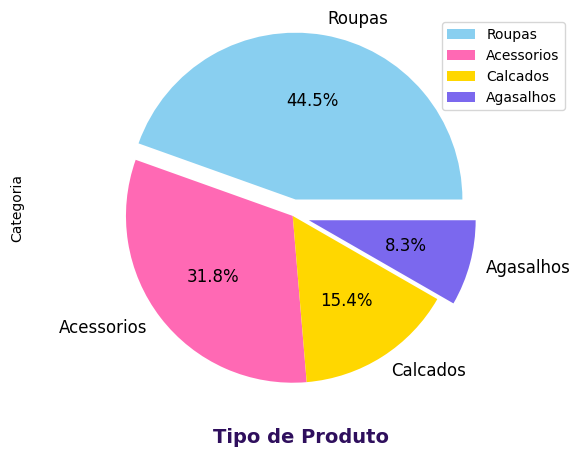

In [87]:
# Plotando um gráfico de barras mostrando as vendas por tipo de produto
#
#plt.figure(figsize = (20, 6))
#ax = dataset["Categoria"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
#ax.set_xticklabels(('Roupas','Acessorios','Calcados','Agasalhos'))

#for p in ax.patches:
#    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
#    ax.tick_params(axis = 'both', labelsize = 15)
#plt.xlabel('Tipo de produto', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
#plt.ylabel('Numbero de Ocorrências', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

# Plotando um gráfico de pizza mostrando as vendas por tipo de produto
#
plt.figure(figsize = (7, 5))
counts = dataset["Categoria"].value_counts()
explode = (0.1, 0.0, 0.0, 0.1)

# Definindo as linhas gerais do gráfico
#
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Tipo de Produto', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Qual é a estação do ano com mais vendas?

In [88]:
# Calculando a estação do ano que possui mais vendas
#
estacao_com_mais_vendas = dataset['Temporada'].mode()[0]
print(f"Estação do ano com mais vendas é {estacao_com_mais_vendas}")

Estação do ano com mais vendas é Primavera


Outra informação importante. Já que é na primavera que vendemos mais, seremos mais eficientes em vendas se nossos recursos utilizados na campanha de marketing forem gastos com mais ênfase no início dessa temporada.

Qual é o tipo de envio mais comum para clientes com nota de avaliação acima de 4?

In [89]:
# Descobrindo qual é o envio mais comum feito por clientes que deram avaliação acima de 4
#
tipo_envio_para_clientes_com_alta_avaliacao = dataset[dataset['Avaliacao'] > 4]['Envio'].mode()[0]
print(f"O tipo de envio mais comum para clientes com nota de avaliação acima de 4 é {tipo_envio_para_clientes_com_alta_avaliacao}")

O tipo de envio mais comum para clientes com nota de avaliação acima de 4 é Free Shipping


Percebemos que a modalidade de envio gratuito de produtos é um importante fator de atração de clientes satisfeitos. Podemos buscar maneiras mais ágeis e baratas para esse tipo de envio, amentando a sua fequência e sua fidelidade.

São nos clientes mais satisfeitos que devemos investir mais esforço de vendas.

Plotamos a seguir como se distribui o dataset com relação ao sexo dos clientes em um gráfico *pizza*.

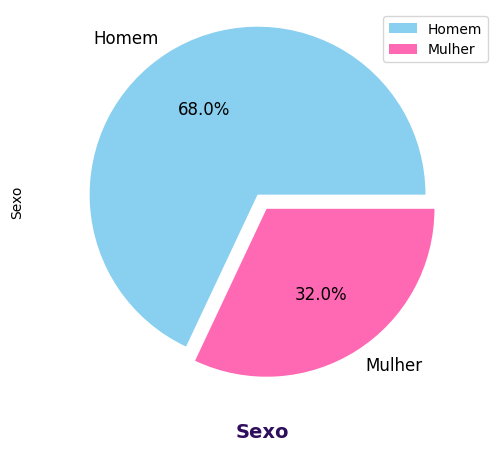

In [ ]:
# Plotando um gráfico de barras mostrando o número e a proporção entre clientes homens e clientes mulheres
#
#plt.figure(figsize = (15, 5))
#ax = dataset["Sexo"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
#ax.set_xticklabels(('Homem', 'Mulher'))

#for p in ax.patches:
#    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
#    ax.tick_params(axis = 'both', labelsize = 12)
#plt.xlabel('Sexo', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 16)
#plt.ylabel('Numero de ocorrências', weight = "bold", color = "#D71313", fontsize = 13, labelpad = 20);

# Plotando um gráfico de pizza mostrando a proporção do sexo dos clientes
#
plt.figure(figsize = (6, 5))
counts = dataset["Sexo"].value_counts()
explode = (0, 0.1)

# Definindo as linhas gerais do gráfico
#
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Sexo', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Acredito que essa é uma das mais importantes informações obtidas do dataset. O perfil do nosso consumidor é basicamente masculino. Essa é a imagem que as pessoas possuem das nossas lojas: "loja para homens".

Podemos fortalecer essa imagem, ou podemos aos poucos tentar atrair o público feminino, com lançamentos específicos de produtos voltados para esse público.

Isso poderá ser discutido posteriormente com a gerência superior da empresa.

Veremos a seguir um *KDE plot* de avaliação x sexo.

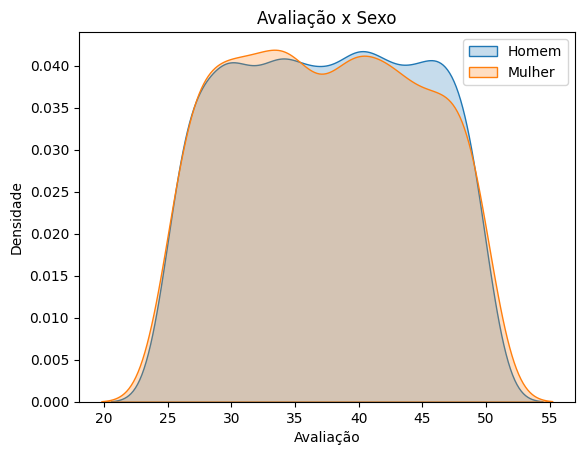

In [128]:
# Plotando um KDE plot entre os atributos "Avaliacao" e "Sexo"
#
sns.kdeplot(dataset[dataset['Sexo'] == 'Homem']['Avaliacao'], label='Homem', shade=True)
sns.kdeplot(dataset[dataset['Sexo'] == 'Mulher']['Avaliacao'], label='Mulher', shade=True)
plt.title('Avaliação x Sexo')
plt.xlabel('Avaliação')
plt.ylabel('Densidade')
plt.legend()
plt.show()

Analisando o gráfico acima percebemos que, enquanto que existe um comportamento mais equilibrado entre os homens, existe uma tendência das mulheres mais jovens darem piores notas com relação às com mais idade.

Agora veremos qual a forma de pagamento mais comum escolhida por um cliente durante a compra de um produto.

In [117]:
# Achando a forma de pagamento mais comum entre os clientes
#
forma_pgto_mais_comum = dataset['Forma de Pagamento'].mode()[0]
print(f"A forma de pagamento mais comum é {forma_pgto_mais_comum}")

A forma de pagamento mais comum é Cartao de Credito


Mais uma informação obtida que é relevante. Quando se utiliza o cartão de crédito numa venda, existe uma "taxa por operação", que pode variar entre as empresas, e possui cobranças diferentes para venda no crédito à vista ou parcelado:
- Crédito à vista: varia de 3% a 5% sobre o valor da venda;
- Crédito parcelado: geralmente há cobrança da taxa à vista, além de um percentual menor a cada parcela, entre 1% e 5%.

Ou seja, ao estimular esse tipo de venda, vendemos mais porém diminuimos nosso faturamento.

Isso leva a crer que poderemos repensar na nossa estratégia de marketing, oferecendo mais vantagens no pagamento com PIX ou em dinheiro.

Veremos a distribuição de formas de pagamento em um gráfico *pizza*.

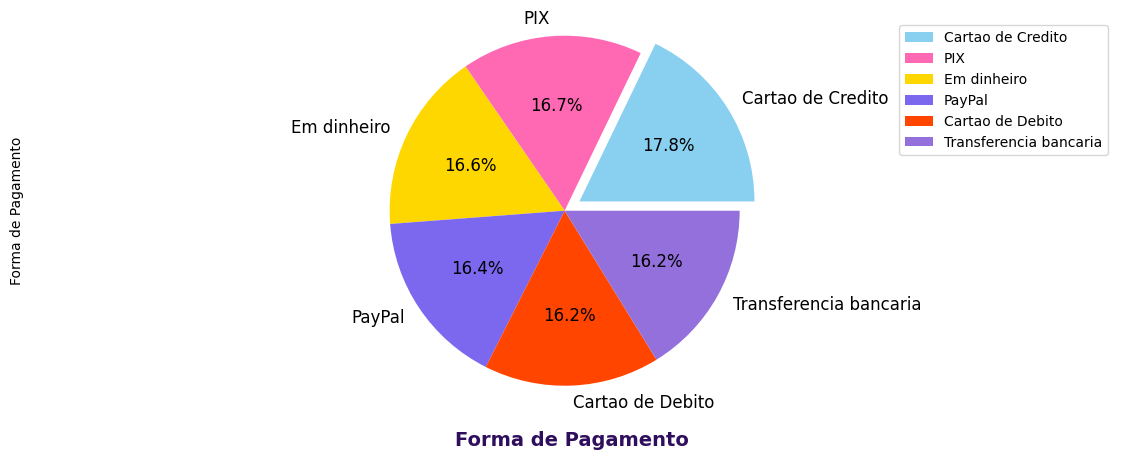

In [ ]:
# Plotando um gráfico pizza com as formas de pagamento
#
plt.figure(figsize = (14, 5))
counts = dataset['Forma de Pagamento'].value_counts()
explode = (0.1, 0, 0, 0, 0.0, 0)

# Definindo as linhas gerais do gráfico
#
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Forma de Pagamento', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Quantos clientes usaram um código promocional para suas compras?

In [120]:
# Calculando o total de clientes que usaram um código promocional em suas compras
#
conta_codigo_promocional = dataset[dataset['Codigo Promocional'] == 'Sim']['ID do Cliente'].count()
print(f"O número de clientes usaram um código promocional durante suas compras é {conta_codigo_promocional}")

O número de clientes usaram um código promocional durante suas compras é 1677


Verificamos que o uso de códigos promocionais pelos clientes é um hábito muito significativo na estatégia de marketing da empresa varejista.

Quantos clientes fizeram mais de 30 compras anteriores?

In [121]:
# Calculando o total de clientes fizeram mais de 30 compras anteriores
#
clientes_com_mais_de_30_compras = dataset[dataset['Vendas Anteriores'] > 30]['ID do Cliente'].count()
print(f"O número de clientes que fizeram mais de 30 compras anteriores é {clientes_com_mais_de_30_compras}")

O número de clientes que fizeram mais de 30 compras anteriores é 1549


Percebemos que existe uma clientela com grande afinidade. Isso é algo que deve ser incentivado em estratégias de campanhas de marketing futuras.

Testaremos se o dataset possui as classes numéricas balanceadas para que possamos tratar o desbalanceamento, caso se mostre necessário.

In [ ]:
# Distribuição das classes (0 = desbalanceada, 1 = balanceada)
#
dataset.groupby('Idade').size()
dataset.groupby('Valor da Venda (USD)').size()
dataset.groupby('Avaliacao').size()
dataset.groupby('Vendas Anteriores').size()

Vendas Anteriores
1     83
2     72
3     91
4     91
5     87
6     87
7     65
8     67
9     65
10    76
11    82
12    79
13    69
14    92
15    73
16    70
17    67
18    84
19    78
20    83
21    96
22    65
23    73
24    91
25    79
26    77
27    78
28    80
29    69
30    82
31    97
32    81
33    82
34    79
35    63
36    71
37    78
38    70
39    81
40    82
41    70
42    83
43    64
44    72
45    83
46    78
47    90
48    90
49    58
50    77
dtype: int64

Eles estão todos balanceados.

Faremos um gráfico *scatter plot* cruzando os atributos "Idade" e "Vendas Anteriores" para ver se existe alguma relação entre eles.

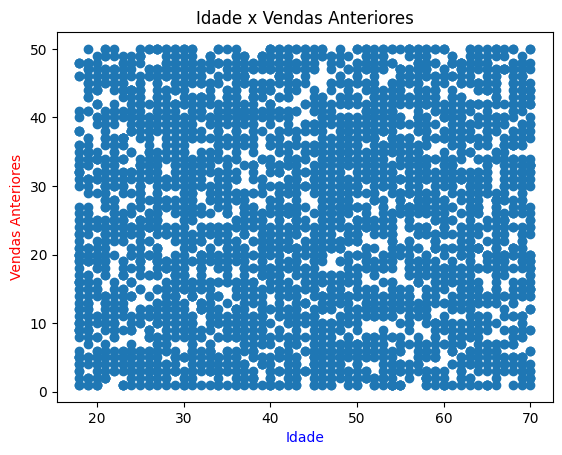

In [ ]:
# Plotando gráfico de "Idade x Vendas Anteriores"
#
plt.scatter(dataset['Idade'], dataset['Vendas Anteriores'])

# Incluindo titulo do gráfico e rótulos dos eixos
#
plt.title('Idade x Vendas Anteriores')
plt.xlabel('Idade', color='blue')
plt.ylabel('Vendas Anteriores', color='red')
plt.show()

Verificamos que não é possível determinar qualquer relação entre "Idade" e "Vendas Anteriores".

Faremos um outro gráfico *scatter plot* cruzando os atributos "Avaliacao" e "Valor da Venda (USD)" para ver se existe alguma relação entre eles.

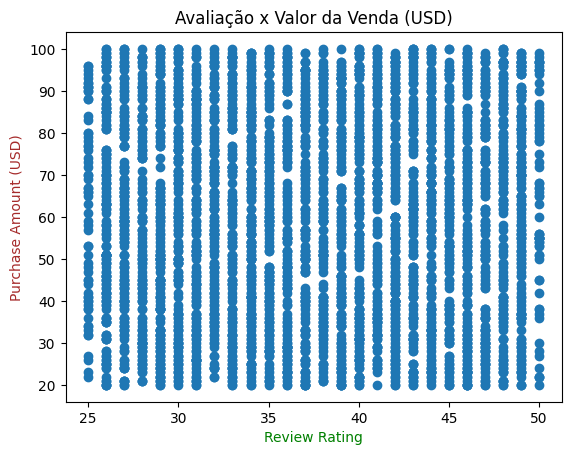

In [ ]:
# Plotando gráfico de "Avaliação x Valor da Venda (USD)"
#
plt.scatter(dataset['Avaliacao'], dataset['Valor da Venda (USD)'])

# Incluindo titulo do gráfico e rótulos dos eixos
#
plt.title('Avaliação x Valor da Venda (USD)')
plt.xlabel('Review Rating', color='green')
plt.ylabel('Purchase Amount (USD)', color='brown')
plt.show()

Verificamos que não foi possível determinar qualquer relação entre "Review Rating" e "Purchase Amount (USD)".

Escrever alguma coisa

In [ ]:
test_size = 0.20
seed = 7

# Separando em conjuntos de treino e teste (dataset original)
#
array = dataset.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [ ]:
# Separando em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:6]
y_sm = array[:,6]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

NameError: ignored

Vamos calcular o faturamento total por estado, procurando descobrir se existe algum estado que tenha se destacado em relação ao faturamento.

In [103]:
# Calculando o faturamento total p/ estado
#
faturamento_por_estado = dataset[[ 'Localizacao','Valor da Venda (USD)' ]].groupby ('Localizacao').sum()
display(faturamento_por_estado)

,Valor da Venda (USD)
Localizacao,
Alabama,5261
Alaska,4867
Arizona,4326
Arkansas,4828
California,5605
Colorado,4222
Connecticut,4226
Delaware,4758
Florida,3798


Agora vamos observar melhor esse resultado em um gráfico *bar plot*, verificando graficamente quais estados se destacam pelo faturamento.

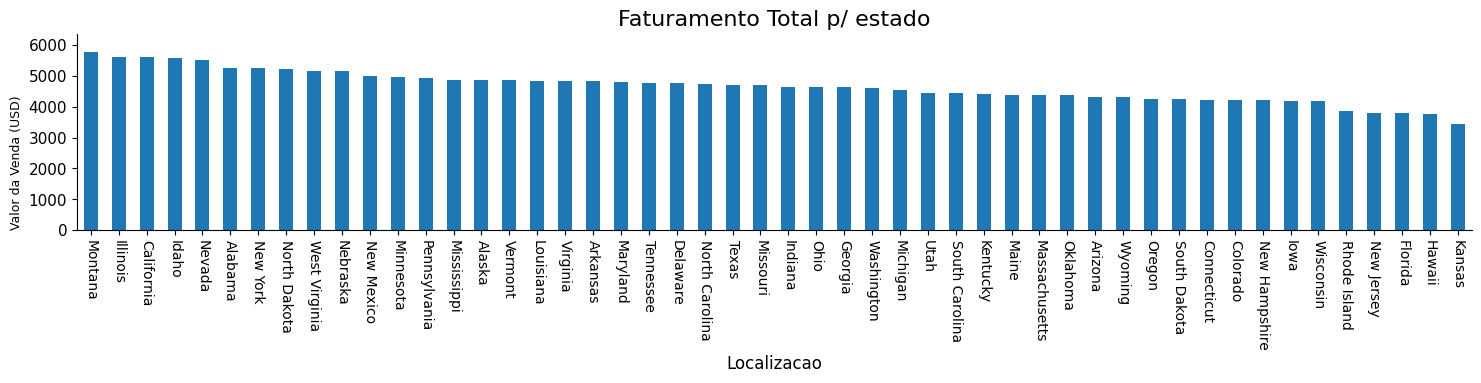

In [96]:
# Plotando o gráfico de barras de "Faturamento Total p/ estado"
#
faturamento_por_estado['Valor da Venda (USD)'].sort_values(ascending = False).plot(kind='bar', figsize=(18, 4), title='Valor da Venda (USD)', fontsize=11)
plt.gca().spines[['top', 'right']].set_visible(False)

# Incluindo no gráfico de barras o título do gráfico e a legenda
#
plt.xticks(rotation=-90, fontsize=10)
plt.title('Faturamento Total p/ estado', fontsize=16, loc="center")
plt.xlabel('Localizacao', fontsize=12, loc="center");
plt.ylabel('Valor da Venda (USD)', fontsize=9, loc="bottom")
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.39)

# Plotando no canto inferior esquerdo da figura como o ponto XY (0, 0)
#
#plt.xlim(left=0)
#plt.ylim(bottom=0)

plt.show()

Pelo gráfico podemos verificar que os 5 estados - por ordem decrescente - com maior faturamento são Montana, Illinois, California, Idaho, e Nevada.

Com esse resultado, iremos pesquisar mais a fundo para descobrir o motivo dessas estados possuirem mais vendas que o restante.

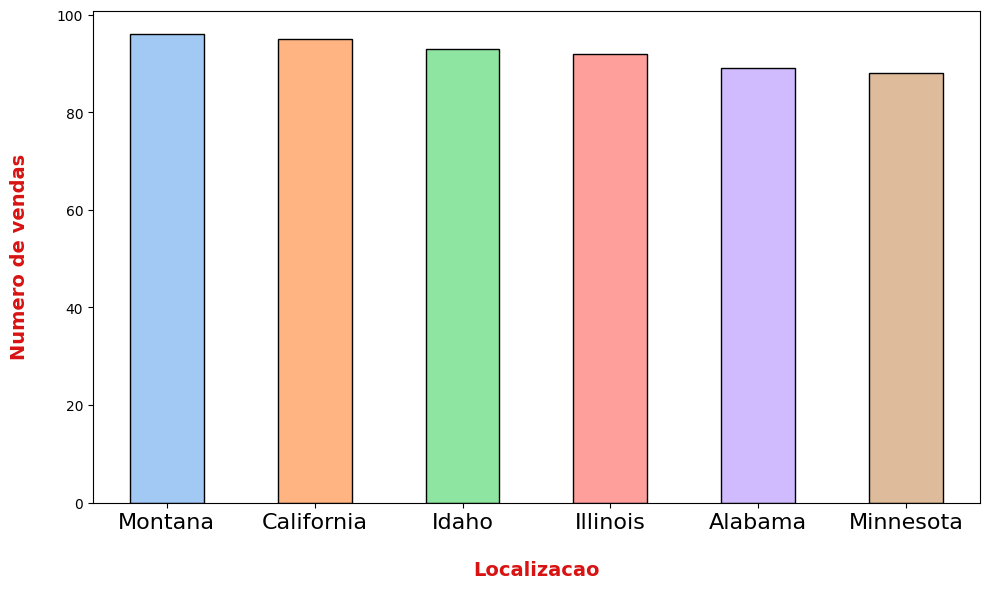

In [115]:
plt.figure(figsize = (10, 6))
dataset["Localizacao"].value_counts()[:6].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('pastel'), edgecolor = 'black')
faturamento_por_estado = dataset[[ 'Localizacao','Valor da Venda (USD)' ]].groupby ('Localizacao').sum()
plt.xlabel('Localizacao', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Numero de vendas', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

Verificamos que esses estados se desstacaram porque tiveram mais vendas.

### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo numérico do dataset.

O histograma ilustra como uma determinada amostra de dados está distribuída, dispondo visualmente as informações de modo a facilitar a visualização da sua distribuição. Esse gráfico busca ressaltar a localização do valor central, e a forma da distribuição dos dados ao seu redor.

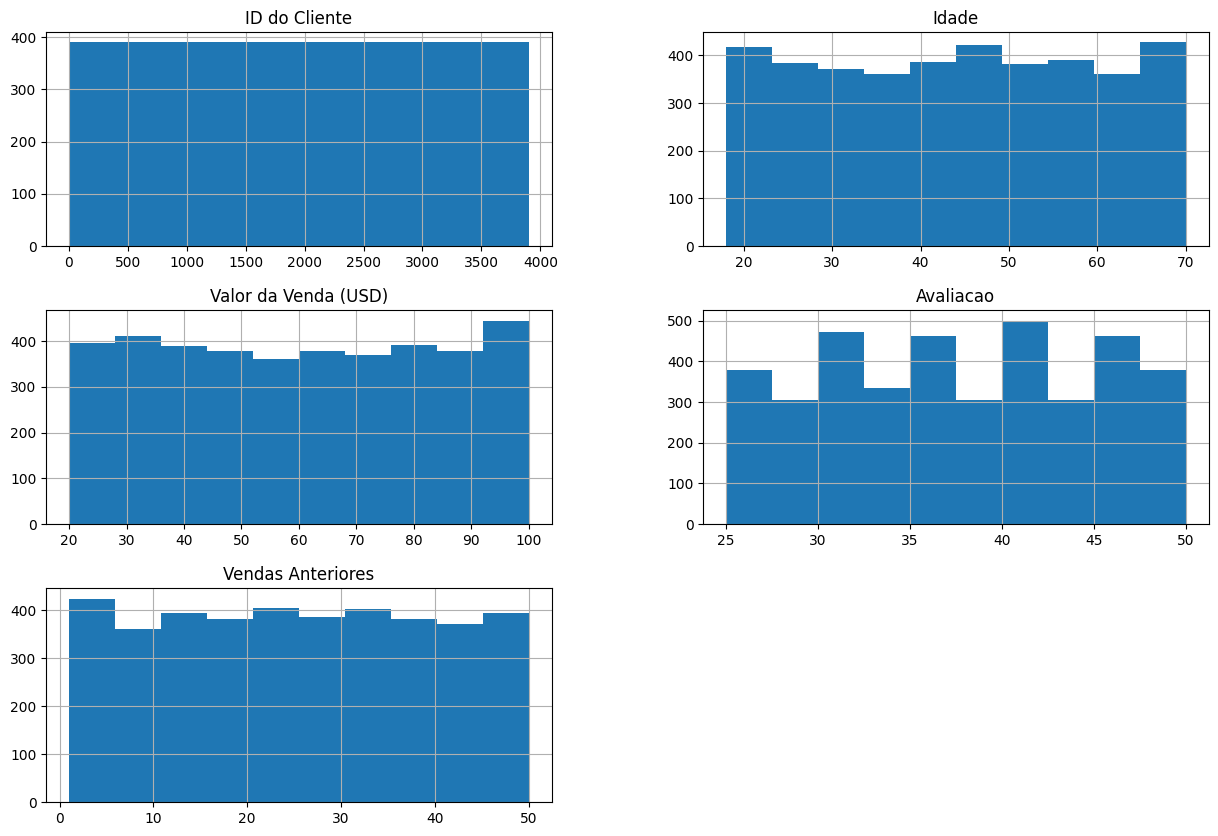

In [ ]:
# Plotando o histograma
#
dataset.hist(figsize = (15,10))
plt.show()

Analisando os gráficos verificamos que todos os 5 atributos numéricos não possuem um valor central, já que suas distribuições são todas uniformes.

Faremos agora o Gráfico de Densidade (*ou Density Plot*), que é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo numérico do dataset.

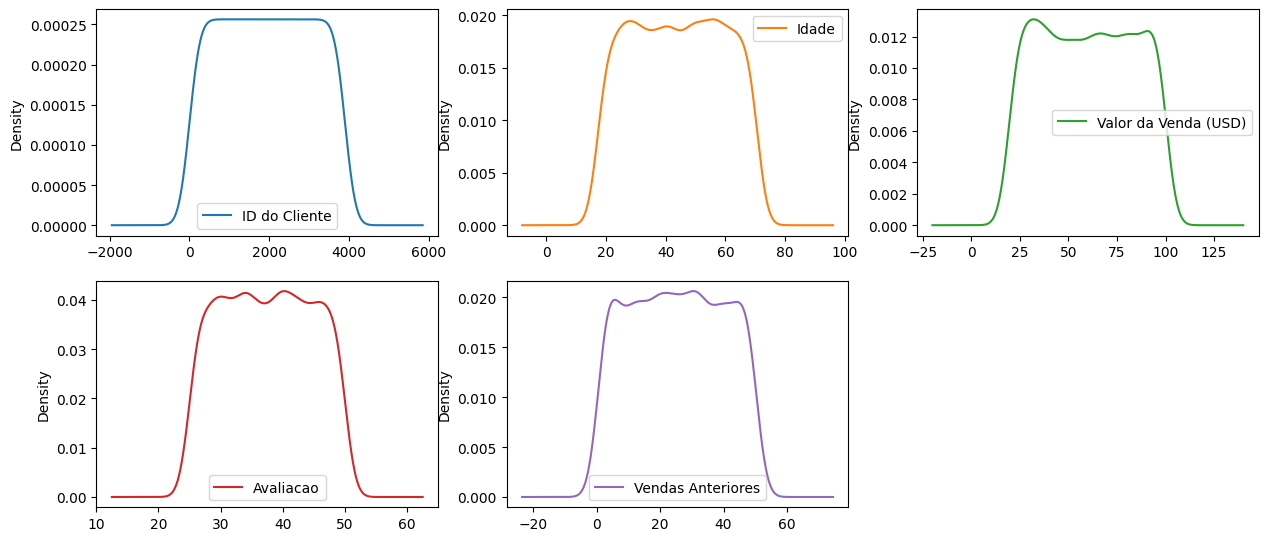

In [ ]:
# Plotando com o Density Plot
#
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Verificamos que todos os atributos possuem uma distribuição semelhante, ou seja, sem valor central.

Agora vamos trabalhar com *boxplots*. No gráfico *boxblot*, a linha no centro representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), ele pode ser considerado outlier.*

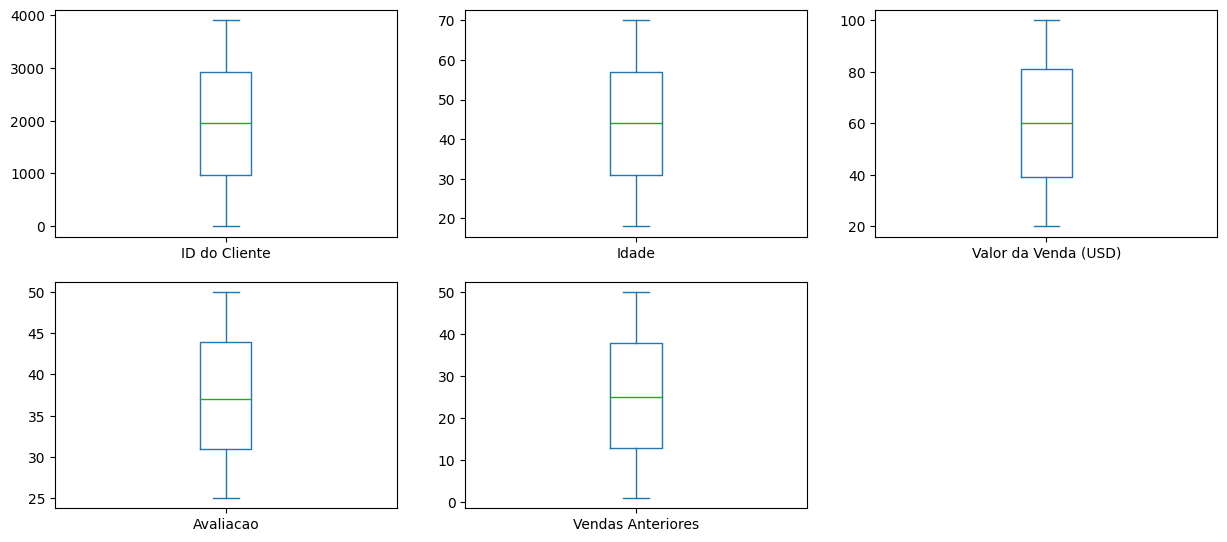

In [91]:
# Plotando com o Boxplot
#
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Podemos confirmar que os cinco atributos numéricos do dataset são uniformes e não possuem outliers.

Veremos a seguir um gráfico de violino de Avaliação do cliente por categoria de produto.

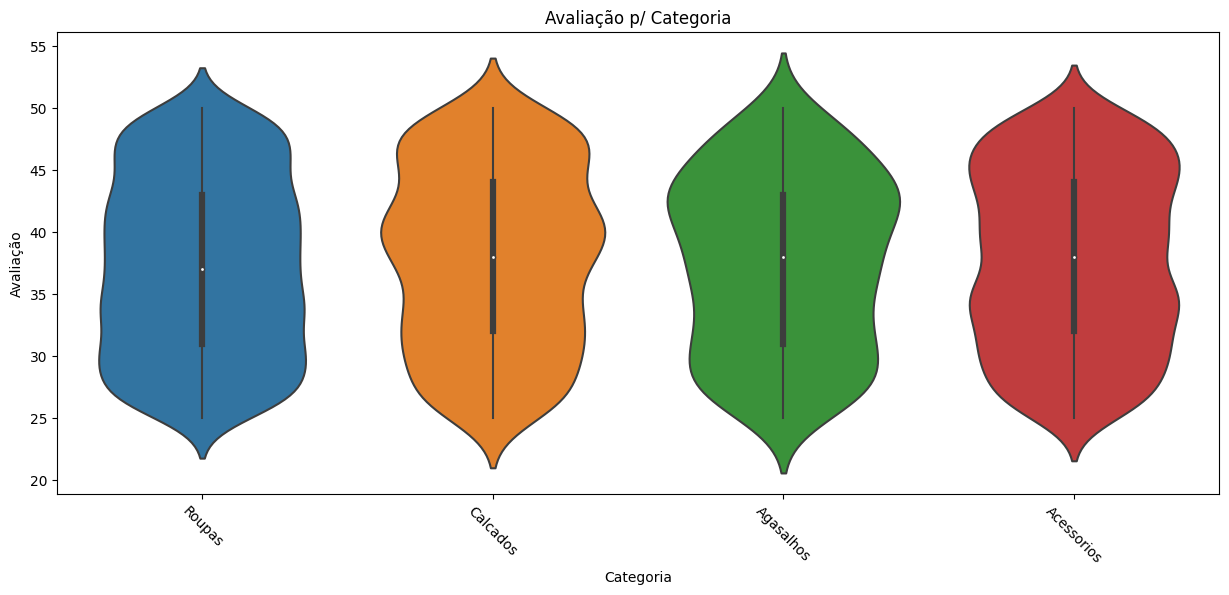

In [126]:
# Plotando o gráfico de violino de avaliação p/ categoria
#
plt.figure(figsize=(15, 6))
sns.violinplot(x='Categoria', y='Avaliacao', data=dataset)
plt.title('Avaliação p/ Categoria')
plt.xlabel('Categoria')
plt.ylabel('Avaliação')
plt.xticks(rotation=-45)
plt.show()

### 3.3. Visualizações Multimodais

A matriz de correlação mostra os valores de correlação de Pearson, que medem o grau de relação linear entre cada par de variáveis. Os valores de correlação podem ter valores entre -1 e +1. Se as duas variáveis tendem a aumentar e diminuir juntas, o valor de correlação é positivo. Se uma variável aumenta enquanto a outra variável diminui, o valor de correlação é negativo. Quando está póximo de zero, não há correlação entre as variáveis.

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que não parece haver estrutura na ordem dos atributos, já que a maioria dos atributos é zero ou muito próximo disso.

Se houvesse algum campo azul ao redor da diagonal, a matriz sugeriria que os atributos possuem alguma proximidade, mostrando os atributos com mais correlação entre si.

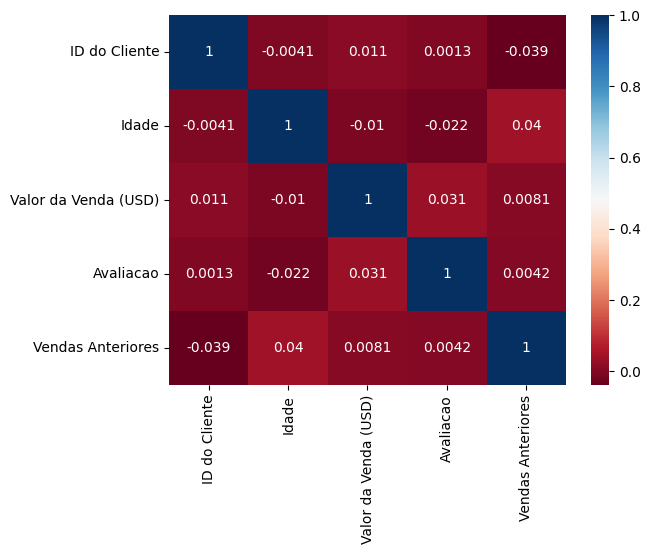

In [ ]:
# Criando uma matriz de Correlação com Matplotlib Seaborn
#
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (*scatter plot*) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o *seaborn* variação 1 e 2.

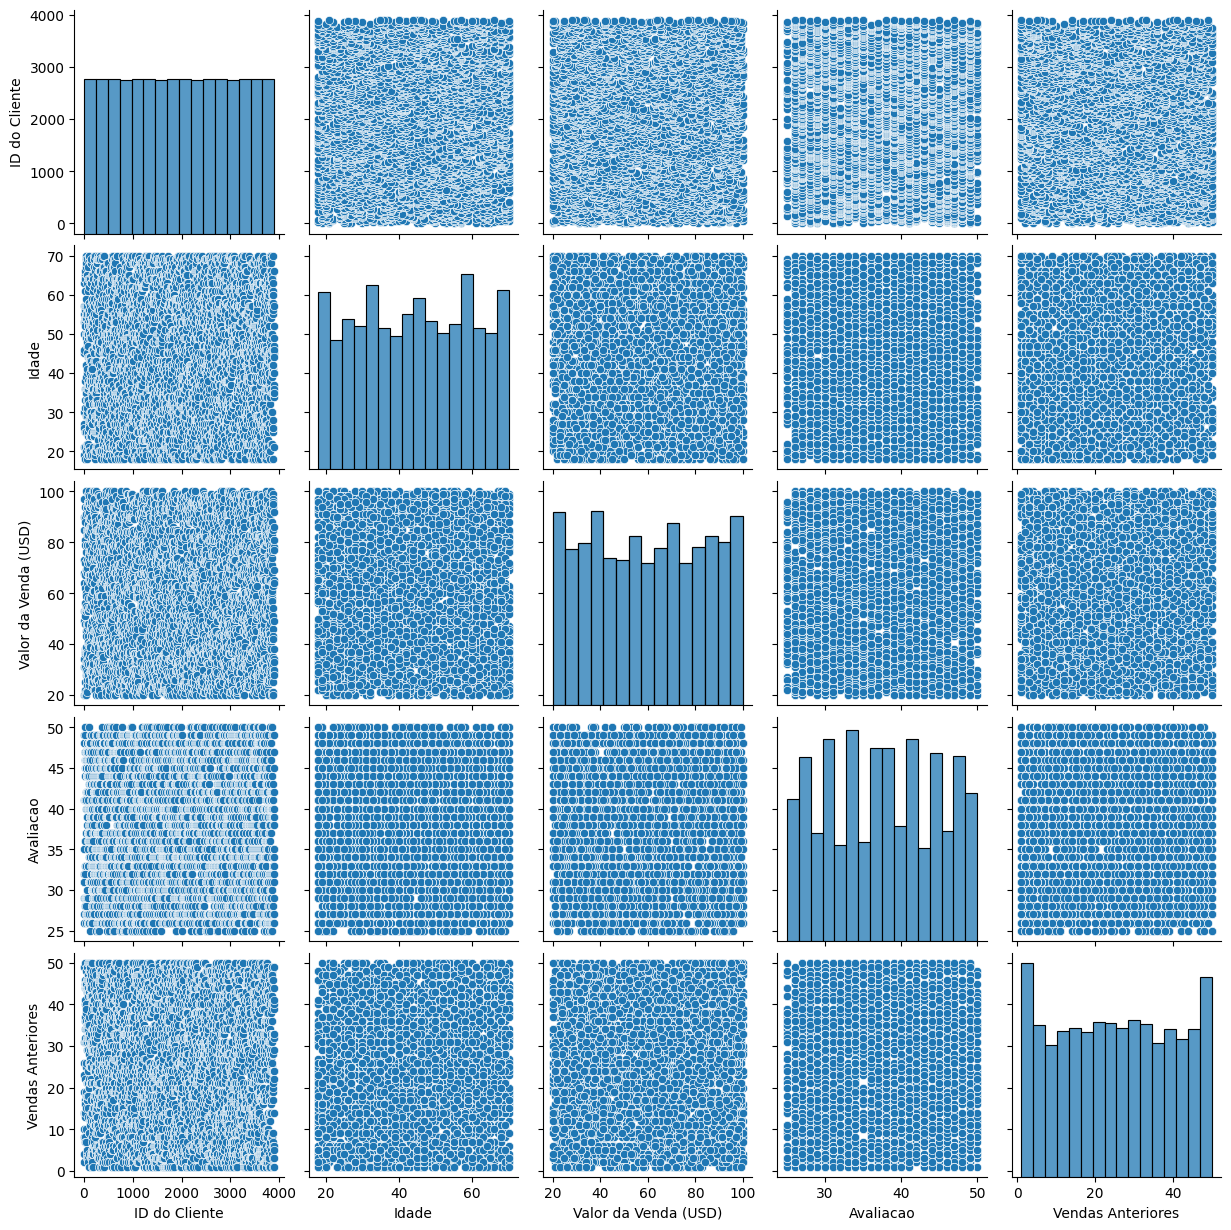

In [ ]:
# Criando uma Scatter Plot com Seaborn - Variação 1
#
sns.pairplot(dataset)

In [ ]:
# Criando uma Scatter Plot com Seaborn - Variação 2
#
sns.pairplot(dataset, hue = "ID do Cliente", height = 2.5);

Novamente observando os gráficos obtidos percebemos que não existe corelação entre as variáveis.

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

Verificaremos se há algum valor *NULL* (nulo) no dataset.

In [ ]:
# Verificando nulls no dataset
#
dataset.isnull().sum()

Não existe atributo com campo missing (com valor *NULL*) no dataset.

Retirando a última coluna do dataset.

In [ ]:
# Salvando um NOVO dataset para tratamento de missings, com cuidado para não sobrescrever o dataset original

# Recuperando os nomes das colunas
colunas = list(dataset.columns)

# O novo dataset irá conter todas as colunas com exceção da última (Frequencia de Vendas)
atributos = dataset[col[0:-1]]

# Substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# Exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Removendo as colunas 'Assinatura' e 'Codigo Promocional'.

In [ ]:
# Removendo as colunas 'Assinatura' e 'Promo Code Used'
#
atributos.drop(['Assinatura', 'Codigo Promocional'], axis=1, inplace= True)

# Exibindo visualização matricial da nulidade do dataset
#
ms.matrix(atributos)

Zerando os campos não preenchidos do atributo "Idade".

In [ ]:
# Substituindo os NaN de 'Idade' por 0
#
atributos['Idade'].fillna(0, inplace=True)

Substituindo os campos não preenchidos de 'Valor da Venda (USD)', 'Avaliacao'e 'Vendas Anteriores' pela mediana dos restantes valores da coluna.

In [ ]:
# Substituindo os NaN de 'Valor da Venda (USD)', 'Avaliacao' e 'Vendas Anteriores' pela mediana da coluna
#
atributos['Valor da Venda (USD)'].fillna(atributos['Valor da Venda (USD)'].median(), inplace=True)
atributos['Avaliacao'].fillna(atributos['Avaliacao'].median(), inplace=True)
atributos['Vendas Anteriores'].fillna(atributos['Vendas Anteriores'].median(), inplace=True)

# Exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Salvando o dataset antigo e mostrando as primeiras 10 linhas do dataset após a limpeza.

In [ ]:
# Guardando o novo dataset para testes futuros
#
datasetSemMissings = atributos

# Incluindo a coluna 'Frequencia de Vendas' no novo dataset
#
datasetSemMissings['Frequencia de Vendas'] = dataset['Frequencia de Vendas']

# Exibindo as primeiras linhas
#
datasetSemMissings.head(10)

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


## Conclusão

Neste MVP foi possível verificar que... [escreva aqui os seu principais achados, pontos de atenção, etc.]